In [2]:
 pip install MetaTrader5

In [102]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5

In [103]:
# подключимся к MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [107]:
#Получим тики EURRUB и USDRUB с 13:00 25 ноября 2020 по 13:00 26 ноября 2020
eurrub_ticks2 = mt5.copy_ticks_range("EURRUB", datetime(2020,11,25,13), datetime(2020,11,26,13), mt5.COPY_TICKS_ALL)
usdrub_ticks2 = mt5.copy_ticks_range("USDRUB", datetime(2020,11,25,13), datetime(2020,11,26,13), mt5.COPY_TICKS_ALL)

In [108]:
# Завершим подключение
mt5.shutdown()

True

In [113]:
#Переведем имеющиеся у нас данные в DataFrame
eurrub_ticks_frame = pd.DataFrame(eurrub_ticks2)
usdrub_ticks_frame = pd.DataFrame(usdrub_ticks2)
#Время в MetaTrader 5 хранится в UTC таймзоне, поэтому переведем в привычный нам вид
eurrub_ticks_frame['time']=pd.to_datetime(eurrub_ticks_frame['time'], unit='s')
usdrub_ticks_frame['time']=pd.to_datetime(usdrub_ticks_frame['time'], unit='s')

In [114]:
eurrub_ticks_frame

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2020-11-25 08:00:03,89.6820,89.9913,0.0,0,1606291203677,130,0.0
1,2020-11-25 08:00:03,89.6804,89.9897,0.0,0,1606291203927,134,0.0
2,2020-11-25 08:00:03,89.6686,89.9779,0.0,0,1606291203940,134,0.0
3,2020-11-25 08:00:03,89.6619,89.9712,0.0,0,1606291203998,134,0.0
4,2020-11-25 08:00:04,89.6617,89.9710,0.0,0,1606291204036,134,0.0
...,...,...,...,...,...,...,...,...
47005,2020-11-26 07:59:56,89.8599,90.1692,0.0,0,1606377596924,6,0.0
47006,2020-11-26 07:59:58,89.8619,90.1712,0.0,0,1606377598067,6,0.0
47007,2020-11-26 07:59:58,89.8651,90.1744,0.0,0,1606377598452,6,0.0
47008,2020-11-26 07:59:59,89.8671,90.1764,0.0,0,1606377599031,6,0.0


In [115]:
usdrub_ticks_frame

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2020-11-25 08:00:00,75.4378,75.4632,0.0,0,1606291200089,130,0.0
1,2020-11-25 08:00:03,75.4382,75.4633,0.0,0,1606291203811,134,0.0
2,2020-11-25 08:00:03,75.4337,75.4546,0.0,0,1606291203940,134,0.0
3,2020-11-25 08:00:03,75.4246,75.4481,0.0,0,1606291203998,134,0.0
4,2020-11-25 08:00:04,75.4237,75.4481,0.0,0,1606291204035,130,0.0
...,...,...,...,...,...,...,...,...
74758,2020-11-26 07:59:58,75.4747,75.4985,0.0,0,1606377598282,6,0.0
74759,2020-11-26 07:59:58,75.4742,75.4975,0.0,0,1606377598583,6,0.0
74760,2020-11-26 07:59:58,75.4772,75.5002,0.0,0,1606377598884,6,0.0
74761,2020-11-26 07:59:59,75.4767,75.5009,0.0,0,1606377599186,6,0.0


###  bid - продать, ask - купить

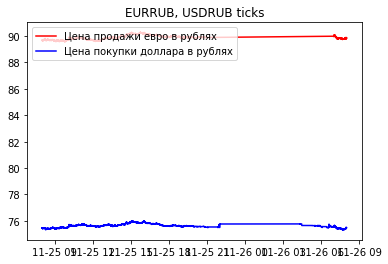

In [118]:
#Посмотрим на графике наши значения
plt.plot(eurrub_ticks_frame['time'], eurrub_ticks_frame['bid'], 'r-', label='Цена продажи евро в рублях')
plt.plot(usdrub_ticks_frame['time'], usdrub_ticks_frame['ask'], 'b-', label='Цена покупки доллара в рублях')

# выведем легенды 
plt.legend(loc='upper left')
 
# добавим заголовок 
plt.title('EURRUB, USDRUB ticks')
 
# покажем график
plt.show()

In [ ]:
for i in eurrub_ticks_frame['bid']